In [1]:
#!/usr/bin/env python3
"""
Trains a convolutional neural network to classify the CIFAR 10 dataset:
"""
%tensorflow_version 1.x
import tensorflow.keras as K


def preprocess_data(X, Y):
    """
    a function that trains a convolutional neural network to classify the
    CIFAR 10 dataset
    :param X: X is a numpy.ndarray of shape (m, 32, 32, 3) containing the
    CIFAR 10 data, where m is the number of data points
    :param Y: Y is a numpy.ndarray of shape (m,) containing the CIFAR 10
    labels for X
    :return: X_p, Y_p
        X_p is a numpy.ndarray containing the preprocessed X
        Y_p is a numpy.ndarray containing the preprocessed Y
    """
    X_p = K.applications.resnet50.preprocess_input(X)
    Y_p = K.utils.to_categorical(Y, 10)
    return X_p, Y_p


if __name__ == "__main__":
    (x_train, y_train), _ = K.datasets.cifar10.load_data()
    print((x_train.shape, y_train.shape))
    x_train, y_train = preprocess_data(x_train, y_train)
    print((x_train.shape, y_train.shape))

    input_tensor = K.Input(shape=(32, 32, 3))
    # ResNet50 works best with 224 x 224 images
    x = K.layers.UpSampling2D((2, 2))(input_tensor)
    x = K.layers.UpSampling2D((2, 2))(x)
    x = K.layers.UpSampling2D((2, 2))(x)
    model = K.applications.ResNet50(include_top=False,
                                    weights="imagenet",
                                    input_tensor=x)

    last_layer = model.layers[-1].output

    FC = K.layers.Flatten()(last_layer)
    FC = K.layers.BatchNormalization()(FC)
    FC = K.layers.Dense(128, activation='relu')(FC)
    FC = K.layers.Dropout(0.5)(FC)
    FC = K.layers.BatchNormalization()(FC)
    FC = K.layers.Dense(64, activation='relu')(FC)
    FC = K.layers.Dropout(0.5)(FC)
    FC = K.layers.BatchNormalization()(FC)
    FC = K.layers.Dense(units=10, activation="softmax")(FC)

    model = K.models.Model(inputs=model.input, outputs=FC)

    check_point = K.callbacks.ModelCheckpoint(filepath="cifar10.h5",
                                              monitor="acc",
                                              mode="max",
                                              save_best_only=True,
                                              )

    model.compile(loss='categorical_crossentropy',
                  optimizer=K.optimizers.RMSprop(lr=2e-5),
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=1,
                        callbacks=[check_point])
    model.save("cifar10.h5")

TensorFlow 1.x selected.
170500096/170498071 [==============================] - 6s 0us/step
((50000, 32, 32, 3), (50000, 1))
((50000, 32, 32, 3), (50000, 10))
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
94773248/94765736 [==============================] - 4s 0us/step
Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 452s 9ms/sample - loss: 1.4107 - acc: 0.5395
Epoch 2/5
50000/50000 [==============================] - 416s 8ms/sample - loss: 0.7774 - acc: 0.7921
Epoch 3/5
50000/50000 [==============================] - 416s 8ms/sample - loss: 0.5436 - acc: 0.8759
Epoch 4/5
50000/50000 [==============================] - 417s 8ms/sample - loss: 0.4059 - acc: 0.9177
Epoch 5/5
50000/50000 [==============================] - 417s 8ms/sample - loss: 0.3074 - acc: 0.9432


In [2]:
# preprocess_data = __import__('0-transfer').preprocess_data

# fix issue with saving keras applications
K.learning_phase = K.backend.learning_phase

_, (X, Y) = K.datasets.cifar10.load_data()
X_p, Y_p = preprocess_data(X, Y)
model = K.models.load_model('cifar10.h5')
model.evaluate(X_p, Y_p, batch_size=128, verbose=1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
10000/10000 [==============================] - 22s 2ms/sample - loss: 0.1875 - acc: 0.9492


[0.1874579804778099, 0.9492]

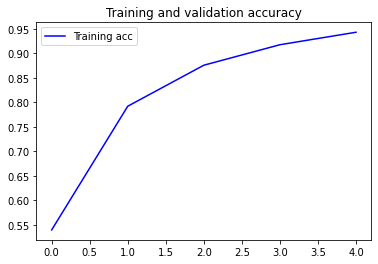

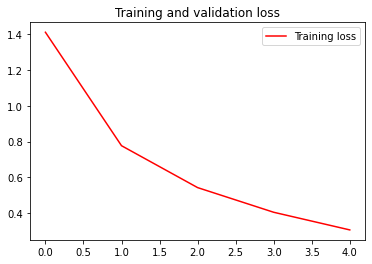

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()